In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

In [2]:
import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.agents

In [3]:
batt = np.linspace(0.1,1,100)

In [4]:
# experiment with different values of rsp for agent_BC
rsp_list =     {'rsp10':0.1, # most linear
                'rsp20':0.2, 
                'rsp30':0.3, 
                'rsp40':0.4,
                'rsp50':0.5,
                'rsp60':0.6,
                'rsp65':0.65,
                'rsp70':0.7,
                'rsp75':0.75,
                'rsp80':0.8,
                'rsp85':0.85,
                'rsp90':0.9,
                'rsp95':0.95,
                'rsp98':0.98, # sharpest ascent
               }

In [5]:
# Save the confirmity values for different values of rsp in a list
conformity = {}
for rsp in rsp_list:
    agent = common.agents.agent_BC(rsp_list[rsp])
    # agent_mBC has similar characteristics.
    # The only difference is that it responds to the 
    # mean battery level and not the immediate battery level
    conformity[rsp] = agent.false_call(batt)

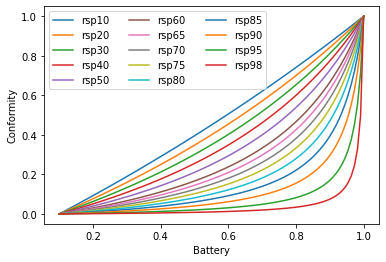

In [6]:
# Visualize how confirmity changes with rsp value

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        # figsize=[fig_width,fig_height], # in inches
                        sharey=True)

for rsp in rsp_list:
    # single_column_figure_width = 3.487
    # double_column_figure_width = 7
    # fig_width = single_column_figure_width
    # fig_height = fig_width / 1.618 *0.6
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)
    axs.plot(batt,conformity[rsp], label=rsp)
    axs.set_xlabel("Battery")
    axs.set_ylabel("Conformity")

axs.legend(loc="upper left",
           ncol=3,
           # fontsize='x-small',
           # bbox_to_anchor=(-0.02,1,1,1),
          )

fig_tag = "plot-BC_char"
fig_filename = "../figures/" + fig_tag +".png"
fig.savefig(fig_filename, dpi=300, bbox_inches='tight', transparent=True)